# 🛍️ Customer Personality Segmentation

### Goal
Segment customers into distinct groups based on their demographics and purchasing behavior, then train a classifier to predict which segment a new customer belongs to.

### Pipeline
1. Load & understand the data
2. Clean the data (missing values, duplicates, useless columns)
3. Feature Engineering (create meaningful features)
4. Outlier detection & capping
5. Feature Scaling & Preprocessing
6. Clustering (find natural customer groups)
7. Classification (train a model to predict cluster)
8. Save model & preprocessor as `.pkl` files

---
## 📦 Step 1 — Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

print('✅ Libraries imported successfully')

✅ Libraries imported successfully


---
## 📂 Step 2 — Load Data

In [2]:
# NOTE: The dataset is tab-separated, so we use sep='\t'
df = pd.read_csv('marketing_campaign.csv', sep='\t')

print(f'Shape: {df.shape}')
print(f'Rows: {df.shape[0]:,} | Columns: {df.shape[1]}')
df.head()

Shape: (2240, 29)
Rows: 2,240 | Columns: 29


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
# Summary statistics
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


---
## 🧹 Step 3 — Data Cleaning

We need to:
- Handle missing values
- Remove duplicates  
- Drop columns that add no value

In [5]:
# Check missing values
missing = df.isnull().sum()
missing_pct = (df.isnull().mean() * 100).round(2)

missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_pct})
missing_df = missing_df[missing_df['Missing Count'] > 0]

print('Columns with missing values:')
print(missing_df)

Columns with missing values:
        Missing Count  Missing %
Income             24       1.07


In [6]:
# Income has missing values - fill with median
# We use median (not mean) because Income is right-skewed and has outliers
print(f'Income median: {df["Income"].median():,.0f}')
print(f'Income mean:   {df["Income"].mean():,.0f}')

df['Income'].fillna(df['Income'].median(), inplace=True)

print(f'\n✅ Missing values after fill: {df.isnull().sum().sum()}')

Income median: 51,382
Income mean:   52,247

✅ Missing values after fill: 0


In [7]:
# Check for duplicates
print(f'Duplicate rows: {df.duplicated().sum()}')

Duplicate rows: 0


In [8]:
# Drop columns that add no value:
# - ID: just a row identifier
# - Z_CostContact & Z_Revenue: constant values, zero variance
columns_to_drop = ['ID', 'Z_CostContact', 'Z_Revenue']
df.drop(columns=columns_to_drop, inplace=True)

print(f'✅ Dropped: {columns_to_drop}')
print(f'New shape: {df.shape}')

✅ Dropped: ['ID', 'Z_CostContact', 'Z_Revenue']
New shape: (2240, 26)


---
## 🔧 Step 4 — Feature Engineering

We'll create new meaningful features from existing ones to better describe each customer's profile.

In [9]:
    # Convert customer join date to datetime (day-first format like "21-08-2013")
    # use errors='coerce' to avoid ValueError for unexpected formats (will produce NaT)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True, errors='coerce')

# --- AGE ---
# Calculate age from birth year
df['Age'] = 2022 - df['Year_Birth']

# --- EDUCATION ---
# Encode education level numerically
# 0 = Basic/High School → 4 = PhD
df['Education'].replace({
    'Basic': 0,
    '2n Cycle': 1,
    'Graduation': 2,
    'Master': 3,
    'PhD': 4
}, inplace=True)

# --- MARITAL STATUS ---
# 1 = living with partner, 0 = not
df['Marital_Status'].replace({
    'Married': 1, 'Together': 1,
    'Absurd': 0, 'Widow': 0, 'YOLO': 0,
    'Divorced': 0, 'Single': 0, 'Alone': 0
}, inplace=True)

# --- CHILDREN ---
# Total children = kids + teens
df['Children'] = df['Kidhome'] + df['Teenhome']

# --- FAMILY SIZE ---
df['Family_Size'] = df['Marital_Status'] + df['Children'] + 1

# --- PARENTAL STATUS ---
df['Parental Status'] = np.where(df['Children'] > 0, 1, 0)

# --- TOTAL SPENDING ---
# Sum of all product spending in last 2 years
df['Total_Spending'] = (df['MntWines'] + df['MntFruits'] + 
                        df['MntMeatProducts'] + df['MntFishProducts'] + 
                        df['MntSweetProducts'] + df['MntGoldProds'])

# --- TOTAL PROMO ---
# Total campaigns accepted
df['Total Promo'] = (df['AcceptedCmp1'] + df['AcceptedCmp2'] + 
                     df['AcceptedCmp3'] + df['AcceptedCmp4'] + 
                     df['AcceptedCmp5'])

# --- DAYS AS CUSTOMER ---
# How long they've been a customer
today = datetime.today()
df['Days_as_Customer'] = (today - df['Dt_Customer']).dt.days

# --- DROP COLUMNS ALREADY USED ---
df.drop(columns=['Year_Birth', 'Kidhome', 'Teenhome', 
                 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                 'AcceptedCmp4', 'AcceptedCmp5', 'Response',
                 'Complain', 'Dt_Customer', 'Family_Size'], 
        inplace=True)

# --- RENAME COLUMNS ---
df.rename(columns={
    'Marital_Status': 'Marital Status',
    'MntWines': 'Wines',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweets',
    'MntGoldProds': 'Gold',
    'NumWebPurchases': 'Web',
    'NumCatalogPurchases': 'Catalog',
    'NumStorePurchases': 'Store',
    'NumDealsPurchases': 'Discount Purchases'
}, inplace=True)

# --- SELECT FINAL COLUMNS ---
final_columns = [
    'Age', 'Education', 'Marital Status', 'Parental Status',
    'Children', 'Income', 'Total_Spending', 'Days_as_Customer',
    'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
    'Web', 'Catalog', 'Store', 'Discount Purchases', 'Total Promo',
    'NumWebVisitsMonth'
]

df = df[final_columns]

print(f'✅ Feature engineering complete')
print(f'Final shape: {df.shape}')
df.head()

✅ Feature engineering complete
Final shape: (2240, 21)


,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
0,65,2,0,0,0,58138.0,1617,4915,58,635,88,546,172,88,88,8,10,4,3,0,7
1,68,2,0,1,2,46344.0,27,4365,38,11,1,6,2,1,6,1,1,2,2,0,5
2,57,2,1,0,0,71613.0,776,4564,26,426,49,127,111,21,42,8,2,10,1,0,4
3,38,2,1,1,1,26646.0,53,4391,26,11,4,20,10,3,5,2,0,4,2,0,6
4,41,4,1,1,1,58293.0,422,4413,94,173,43,118,46,27,15,5,3,6,5,0,5


---
## 📊 Step 5 — Exploratory Data Analysis

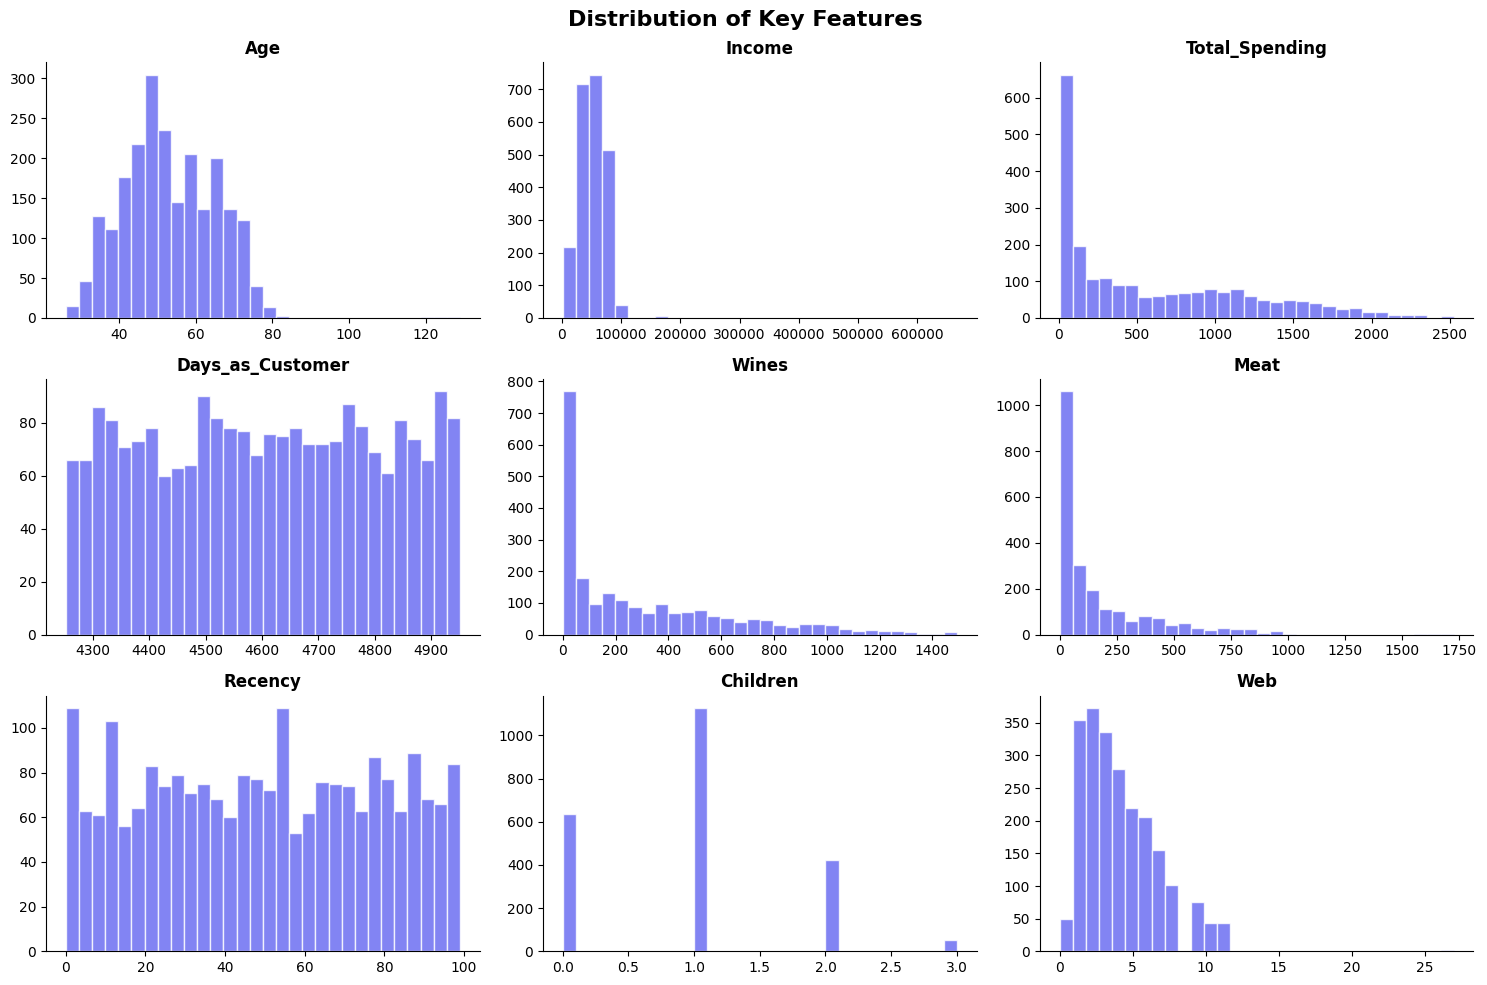

✅ Distribution plots saved


In [10]:
# Distribution of key features
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle('Distribution of Key Features', fontsize=16, fontweight='bold')

key_cols = ['Age', 'Income', 'Total_Spending', 'Days_as_Customer', 
            'Wines', 'Meat', 'Recency', 'Children', 'Web']

for i, col in enumerate(key_cols):
    ax = axes[i // 3][i % 3]
    ax.hist(df[col], bins=30, color='#6366f1', edgecolor='white', alpha=0.8)
    ax.set_title(col, fontweight='bold')
    ax.set_xlabel('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('plots/distributions.png', dpi=150, bbox_inches='tight')
plt.show()
print('✅ Distribution plots saved')

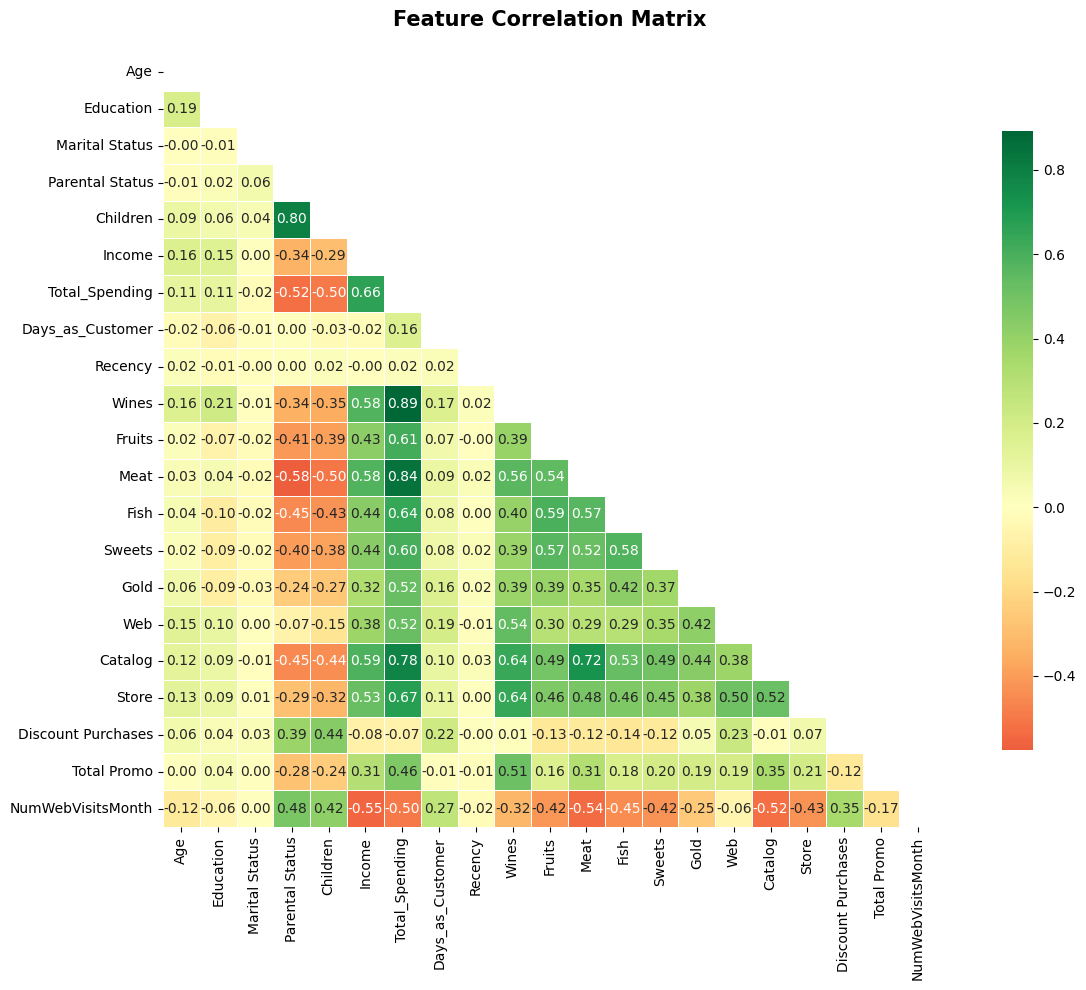

In [11]:
import os
os.makedirs('plots', exist_ok=True)

# Correlation heatmap
plt.figure(figsize=(14, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', 
            cmap='RdYlGn', center=0, square=True,
            linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix', fontsize=15, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('plots/correlation.png', dpi=150, bbox_inches='tight')
plt.show()

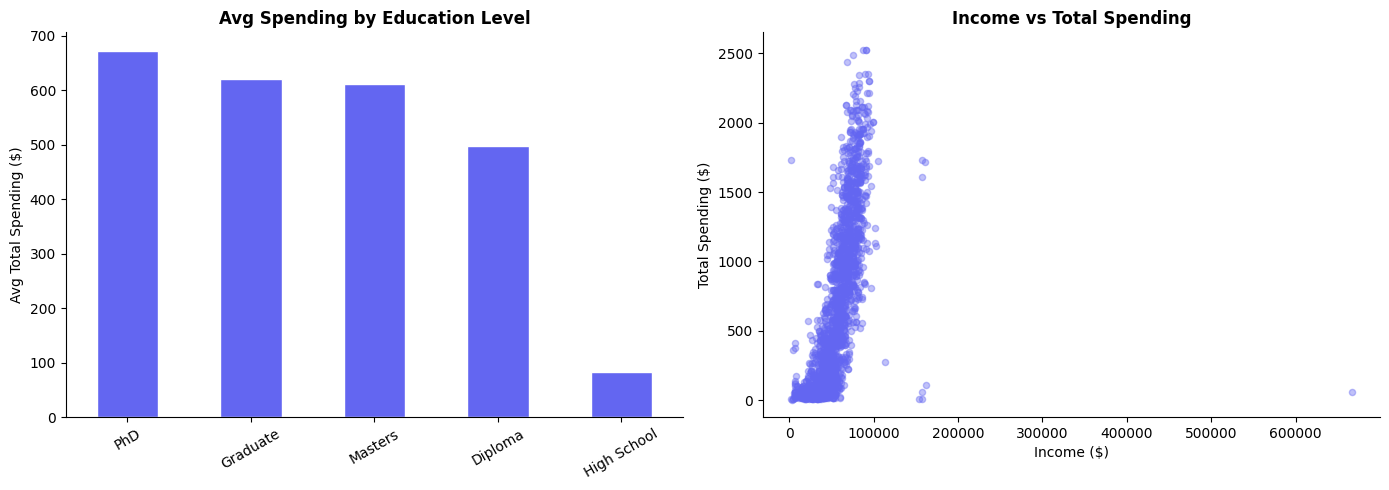

In [12]:
# Spending by education level
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

edu_labels = {0: 'High School', 1: 'Diploma', 2: 'Graduate', 3: 'Masters', 4: 'PhD'}
df['Education Label'] = df['Education'].map(edu_labels)

edu_spend = df.groupby('Education Label')['Total_Spending'].mean().sort_values(ascending=False)
edu_spend.plot(kind='bar', ax=ax1, color='#6366f1', edgecolor='white')
ax1.set_title('Avg Spending by Education Level', fontweight='bold')
ax1.set_xlabel('')
ax1.set_ylabel('Avg Total Spending ($)')
ax1.tick_params(axis='x', rotation=30)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Income vs Total Spending scatter
ax2.scatter(df['Income'], df['Total_Spending'], alpha=0.4, color='#6366f1', s=20)
ax2.set_xlabel('Income ($)')
ax2.set_ylabel('Total Spending ($)')
ax2.set_title('Income vs Total Spending', fontweight='bold')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

df.drop(columns=['Education Label'], inplace=True)
plt.tight_layout()
plt.savefig('plots/spending_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 🔍 Step 6 — Outlier Detection & Capping

We **cap** outliers (replace with boundary values) rather than **remove** them, because:
- Removing rows would lose useful info in other columns
- Our dataset is small (only ~2,200 rows), we can't afford to lose rows

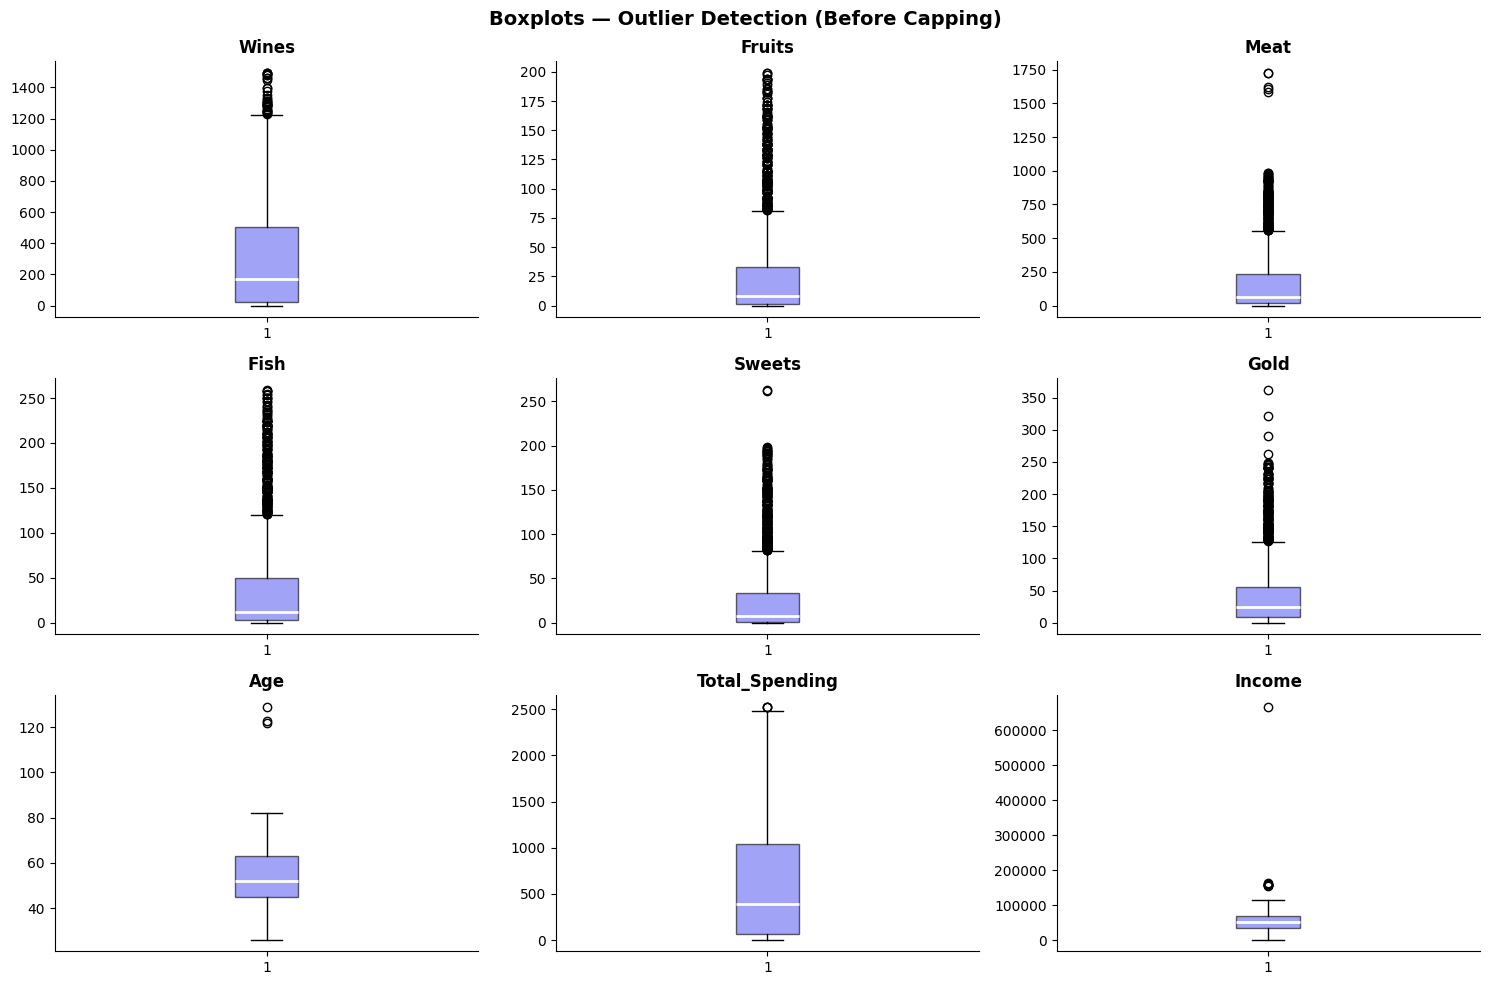

In [13]:
# Visualize outliers with boxplots before capping
outlier_features = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Age', 'Total_Spending', 'Income']

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle('Boxplots — Outlier Detection (Before Capping)', fontsize=14, fontweight='bold')

for i, col in enumerate(outlier_features):
    ax = axes[i // 3][i % 3]
    ax.boxplot(df[col].dropna(), patch_artist=True,
               boxprops=dict(facecolor='#6366f1', alpha=0.6),
               medianprops=dict(color='white', linewidth=2))
    ax.set_title(col, fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [14]:
def cap_outliers_iqr(df, col):
    """
    Caps outliers using IQR method.
    Values below Q1 - 1.5*IQR are set to lower limit.
    Values above Q3 + 1.5*IQR are set to upper limit.
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers_before = ((df[col] < lower) | (df[col] > upper)).sum()
    
    df[col] = df[col].clip(lower=lower, upper=upper)
    
    print(f'{col:25s} | Lower: {lower:8.1f} | Upper: {upper:8.1f} | Outliers capped: {outliers_before}')
    return df

print('Capping outliers using IQR method...')
print('-' * 70)
for col in outlier_features:
    df = cap_outliers_iqr(df, col)

print('\n✅ Outlier capping complete')

Capping outliers using IQR method...
----------------------------------------------------------------------
Wines                     | Lower:   -697.0 | Upper:   1225.0 | Outliers capped: 35
Fruits                    | Lower:    -47.0 | Upper:     81.0 | Outliers capped: 227
Meat                      | Lower:   -308.0 | Upper:    556.0 | Outliers capped: 175
Fish                      | Lower:    -67.5 | Upper:    120.5 | Outliers capped: 223
Sweets                    | Lower:    -47.0 | Upper:     81.0 | Outliers capped: 248
Gold                      | Lower:    -61.5 | Upper:    126.5 | Outliers capped: 207
Age                       | Lower:     18.0 | Upper:     90.0 | Outliers capped: 3
Total_Spending            | Lower:  -1396.4 | Upper:   2510.6 | Outliers capped: 3
Income                    | Lower: -13587.8 | Upper: 117416.2 | Outliers capped: 8

✅ Outlier capping complete


---
## ⚖️ Step 7 — Preprocessing & Scaling

- **StandardScaler** for regular numeric features — normalizes to mean=0, std=1
- **PowerTransformer** for skewed outlier features — makes them more Gaussian
- **SimpleImputer** fills any remaining NaN values
- We save the preprocessor as `preprocessor.pkl` so we can apply the **same transformation** to new data at prediction time

In [15]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pickle

# Split features into two groups
outlier_cols = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Age', 'Total_Spending']
normal_cols = [col for col in df.columns if col not in outlier_cols]

print(f'Normal scaling cols ({len(normal_cols)}): {normal_cols}')
print(f'Power transform cols ({len(outlier_cols)}): {outlier_cols}')

Normal scaling cols (13): ['Education', 'Marital Status', 'Parental Status', 'Children', 'Income', 'Days_as_Customer', 'Recency', 'Web', 'Catalog', 'Store', 'Discount Purchases', 'Total Promo', 'NumWebVisitsMonth']
Power transform cols (8): ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Age', 'Total_Spending']


In [16]:
# Build preprocessing pipeline
normal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

outlier_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('transformer', PowerTransformer(standardize=True))
])

preprocessor = ColumnTransformer([
    ('normal', normal_pipeline, normal_cols),
    ('outlier', outlier_pipeline, outlier_cols)
])

# Fit and transform
scaled_array = preprocessor.fit_transform(df)

# Reconstruct column order to match ColumnTransformer output
all_cols = normal_cols + outlier_cols
scaled_df = pd.DataFrame(scaled_array, columns=all_cols)

# Reorder to match original column order
scaled_df = scaled_df[df.columns]

print(f'✅ Preprocessing done. Scaled shape: {scaled_df.shape}')
scaled_df.head()

✅ Preprocessing done. Scaled shape: (2240, 21)


,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
0,1.005341,-0.458383,-1.346874,-1.584605,-1.264505,0.299651,1.315365,1.531185,0.307039,1.062784,1.487681,1.504406,1.493989,1.474200,1.196801,1.409304,2.510890,-0.550785,0.349414,-0.439037,0.693904
1,1.239521,-0.458383,-1.346874,0.631072,1.396361,-0.263808,-1.441417,-1.190545,-0.383664,-1.211545,-1.001121,-1.376502,-0.889143,-0.987648,-0.967034,-1.110409,-0.568720,-1.166125,-0.168236,-0.439037,-0.130463
2,0.361223,-0.458383,0.742460,-1.584605,-1.264505,0.943420,0.661170,-0.205773,-0.798086,0.748918,1.145877,0.456428,1.435812,0.579704,0.473642,1.409304,-0.226541,1.295237,-0.685887,-0.439037,-0.542647
3,-1.315014,-0.458383,0.742460,0.631072,0.065928,-1.204881,-1.117211,-1.061881,-0.798086,-1.211545,-0.403311,-0.722233,-0.110828,-0.542753,-1.069040,-0.750450,-0.910898,-0.550785,-0.168236,-0.439037,0.281720
4,-1.033428,1.533425,0.742460,0.631072,0.065928,0.307056,0.179322,-0.953012,1.550305,0.123712,1.058075,0.406278,0.832291,0.741799,-0.368949,0.329427,0.115638,0.064556,1.384715,-0.439037,-0.130463


In [17]:
import os
os.makedirs('models', exist_ok=True)

# Save preprocessor — we need this exact object to transform new data later
with open('models/preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

# Also save the column order so the API knows what order to feed data
with open('models/feature_columns.pkl', 'wb') as f:
    pickle.dump(list(df.columns), f)

print('✅ preprocessor.pkl saved')
print('✅ feature_columns.pkl saved')
print(f'Feature order: {list(df.columns)}')

✅ preprocessor.pkl saved
✅ feature_columns.pkl saved
Feature order: ['Age', 'Education', 'Marital Status', 'Parental Status', 'Children', 'Income', 'Total_Spending', 'Days_as_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web', 'Catalog', 'Store', 'Discount Purchases', 'Total Promo', 'NumWebVisitsMonth']


---
## 🔵 Step 8 — Clustering (Finding Customer Groups)

We use KMeans clustering to find natural groupings in the data.
First we use the **Elbow Method** + **Silhouette Score** to find the optimal number of clusters.

In [18]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# PCA for visualization — reduce to 3 components
pca = PCA(n_components=3, random_state=42)
pca_data = pca.fit_transform(scaled_df)

print(f'Explained variance by 3 components: {pca.explained_variance_ratio_.sum():.2%}')
print(f'Per component: {[f"{v:.2%}" for v in pca.explained_variance_ratio_]}')

Explained variance by 3 components: 58.15%
Per component: ['39.49%', '10.83%', '7.83%']


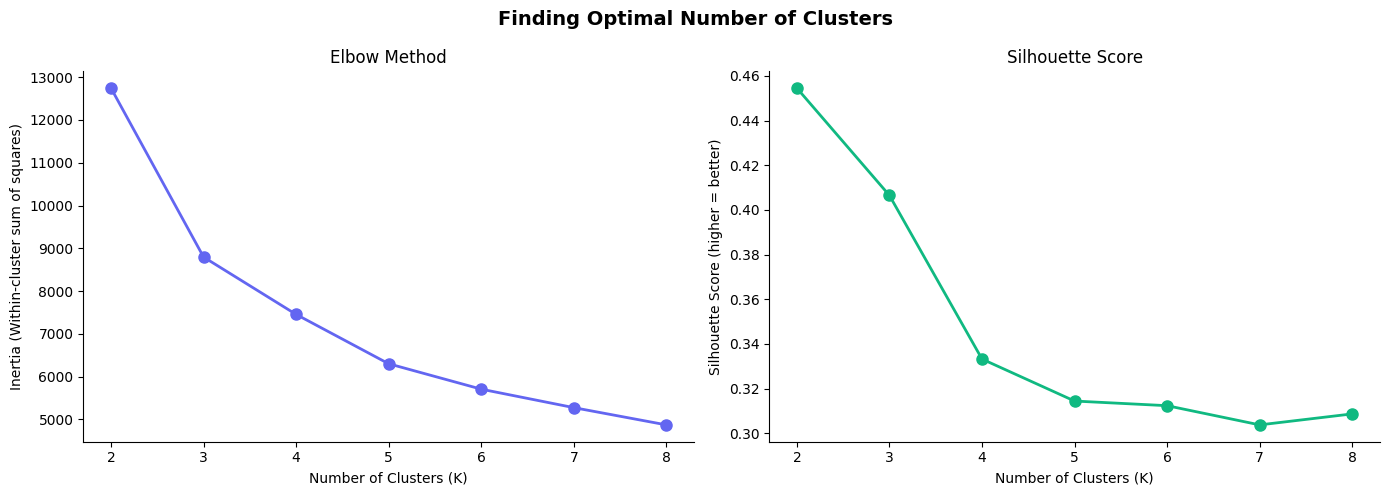


📊 Best K by silhouette score: 2
Silhouette score at K=2: 0.4545


In [19]:
# Elbow method — find optimal K
inertia = []
silhouette_scores = []
K_range = range(2, 9)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(pca_data)
    inertia.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data, km.labels_))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Finding Optimal Number of Clusters', fontsize=14, fontweight='bold')

# Elbow curve
ax1.plot(K_range, inertia, 'o-', color='#6366f1', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Inertia (Within-cluster sum of squares)')
ax1.set_title('Elbow Method')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Silhouette scores
ax2.plot(K_range, silhouette_scores, 'o-', color='#10b981', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (K)')
ax2.set_ylabel('Silhouette Score (higher = better)')
ax2.set_title('Silhouette Score')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('plots/elbow_silhouette.png', dpi=150, bbox_inches='tight')
plt.show()

best_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f'\n📊 Best K by silhouette score: {best_k}')
print(f'Silhouette score at K={best_k}: {max(silhouette_scores):.4f}')

In [20]:
# Train KMeans with optimal K (we use 3 to match reference, change if your elbow says different)
N_CLUSTERS = 3

kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(pca_data)

# Add cluster labels to our dataframe
df['cluster'] = cluster_labels
scaled_df['cluster'] = cluster_labels

print(f'✅ KMeans clustering done with K={N_CLUSTERS}')
print(f'\nCluster distribution:')
print(df['cluster'].value_counts().sort_index())

✅ KMeans clustering done with K=3

Cluster distribution:
cluster
0    948
1    586
2    706
Name: count, dtype: int64


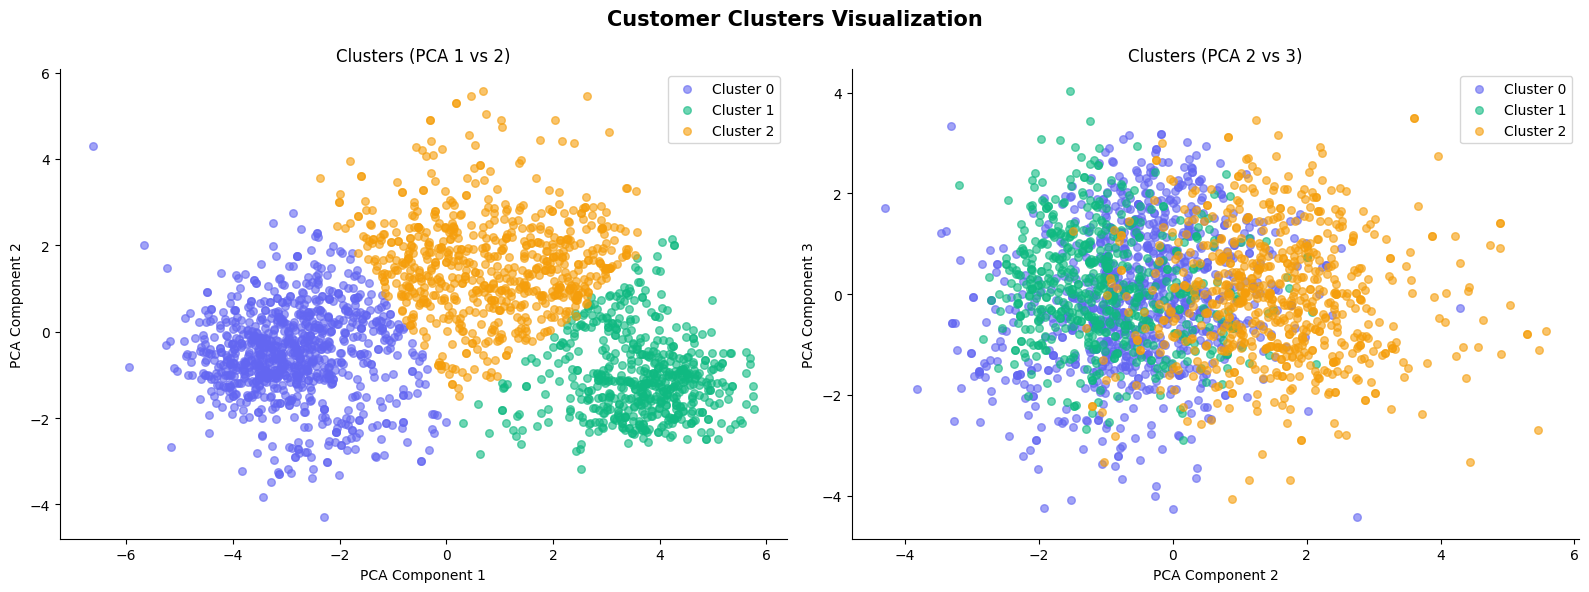

In [21]:
# Visualize clusters in 2D PCA space
colors = ['#6366f1', '#10b981', '#f59e0b', '#ef4444']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Customer Clusters Visualization', fontsize=15, fontweight='bold')

for cluster_id in range(N_CLUSTERS):
    mask = cluster_labels == cluster_id
    ax1.scatter(pca_data[mask, 0], pca_data[mask, 1],
                c=colors[cluster_id], label=f'Cluster {cluster_id}',
                alpha=0.6, s=30)

ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.set_title('Clusters (PCA 1 vs 2)')
ax1.legend()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for cluster_id in range(N_CLUSTERS):
    mask = cluster_labels == cluster_id
    ax2.scatter(pca_data[mask, 1], pca_data[mask, 2],
                c=colors[cluster_id], label=f'Cluster {cluster_id}',
                alpha=0.6, s=30)

ax2.set_xlabel('PCA Component 2')
ax2.set_ylabel('PCA Component 3')
ax2.set_title('Clusters (PCA 2 vs 3)')
ax2.legend()
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('plots/clusters.png', dpi=150, bbox_inches='tight')
plt.show()

=== Cluster Profiles ===
          Age   Income  Total_Spending  Children  Recency  Days_as_Customer
cluster                                                                    
0        50.4  34104.4            77.4       1.2     48.6            4564.4
1        53.7  74715.3          1333.6       0.1     49.0            4591.3
2        56.4  56749.9           711.1       1.2     49.9            4672.6


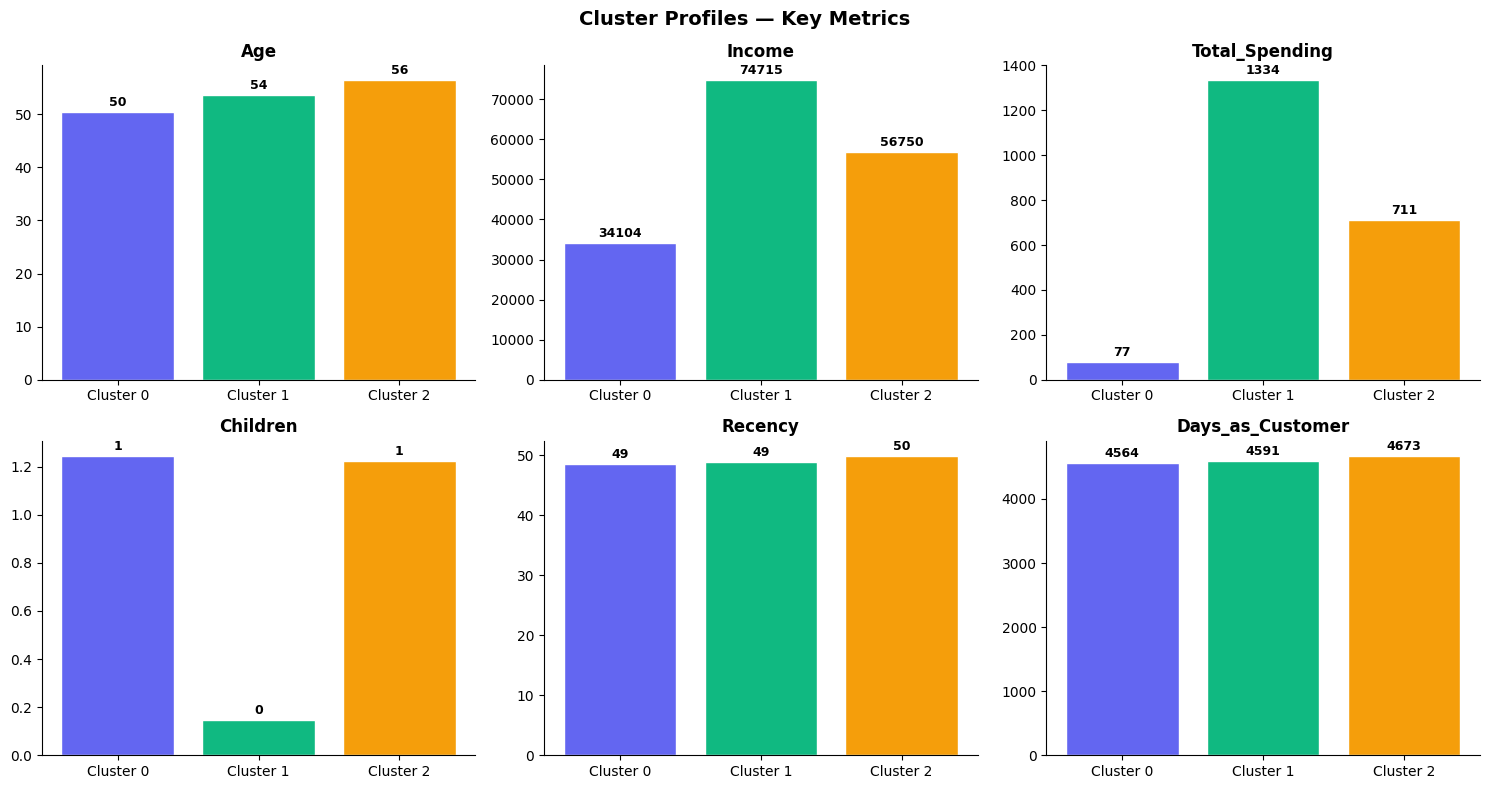

In [22]:
# Profile each cluster — what makes each group unique?
profile_cols = ['Age', 'Income', 'Total_Spending', 'Children', 'Recency', 'Days_as_Customer']
profile = df.groupby('cluster')[profile_cols].mean().round(1)
print('=== Cluster Profiles ===')
print(profile)

# Visual cluster profiles
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Cluster Profiles — Key Metrics', fontsize=14, fontweight='bold')

for i, col in enumerate(profile_cols):
    ax = axes[i // 3][i % 3]
    vals = [df[df['cluster'] == c][col].mean() for c in range(N_CLUSTERS)]
    bars = ax.bar([f'Cluster {c}' for c in range(N_CLUSTERS)], vals,
                  color=colors[:N_CLUSTERS], edgecolor='white')
    ax.set_title(col, fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for bar, val in zip(bars, vals):
        ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max(vals)*0.01,
                f'{val:.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('plots/cluster_profiles.png', dpi=150, bbox_inches='tight')
plt.show()

In [23]:
# Save clustered data for classification step
os.makedirs('data', exist_ok=True)
df.to_csv('data/clustered_data.csv', index=False)
print(f'✅ Clustered data saved to data/clustered_data.csv')
print(f'Shape: {df.shape}')

✅ Clustered data saved to data/clustered_data.csv
Shape: (2240, 22)


---
## 🤖 Step 9 — Classification Model

Now we train a classifier to predict which cluster a new customer belongs to.
We compare multiple models and pick the best one.

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier

# Use scaled features for training (not raw df)
X = scaled_df.drop('cluster', axis=1)
y = scaled_df['cluster']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f'Train size: {X_train.shape[0]:,} | Test size: {X_test.shape[0]:,}')
print(f'Class distribution in train:')
print(y_train.value_counts().sort_index())

Train size: 1,792 | Test size: 448
Class distribution in train:
cluster
0    758
1    469
2    565
Name: count, dtype: int64


In [25]:
# Compare multiple models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss', verbosity=0)
}

results = []

print(f'{"Model":<25} | {"Train Acc":>10} | {"Test Acc":>10} | {"CV Mean":>10} | {"CV Std":>8}')
print('-' * 75)

for name, model in models.items():
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    
    results.append({
        'Model': name,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    })
    print(f'{name:<25} | {train_acc:>10.4f} | {test_acc:>10.4f} | {cv_scores.mean():>10.4f} | {cv_scores.std():>8.4f}')

results_df = pd.DataFrame(results).sort_values('CV Mean', ascending=False)
print(f'\n🏆 Best model: {results_df.iloc[0]["Model"]} (CV: {results_df.iloc[0]["CV Mean"]:.4f})')

Model                     |  Train Acc |   Test Acc |    CV Mean |   CV Std
---------------------------------------------------------------------------
Logistic Regression       |     0.9994 |     0.9955 |     0.9933 |   0.0047
Random Forest             |     1.0000 |     0.9598 |     0.9603 |   0.0107
Decision Tree             |     1.0000 |     0.9397 |     0.9469 |   0.0074
Gradient Boosting         |     1.0000 |     0.9576 |     0.9652 |   0.0097
KNN                       |     0.9676 |     0.9330 |     0.9424 |   0.0148
XGBoost                   |     1.0000 |     0.9598 |     0.9701 |   0.0059

🏆 Best model: Logistic Regression (CV: 0.9933)


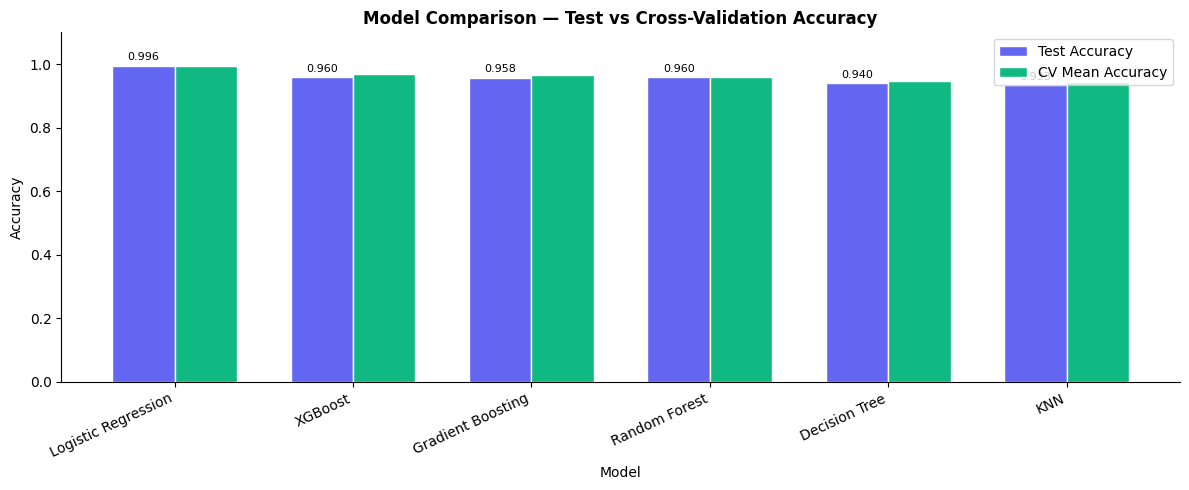

In [26]:
# Visualize model comparison
fig, ax = plt.subplots(figsize=(12, 5))

x = np.arange(len(results_df))
width = 0.35

bars1 = ax.bar(x - width/2, results_df['Test Accuracy'], width, label='Test Accuracy', 
               color='#6366f1', edgecolor='white')
bars2 = ax.bar(x + width/2, results_df['CV Mean'], width, label='CV Mean Accuracy', 
               color='#10b981', edgecolor='white')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison — Test vs Cross-Validation Accuracy', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'], rotation=25, ha='right')
ax.legend()
ax.set_ylim(0, 1.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
            f'{bar.get_height():.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('plots/model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 🔬 Step 10 — Hyperparameter Tuning

We tune the best model using GridSearchCV.

In [27]:
# Tune Logistic Regression (fast + consistent performer)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['lbfgs', 'newton-cg', 'saga'],
    'max_iter': [100, 300, 500, 1000]
}

print('Running GridSearchCV (this may take a minute)...')
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

print(f'\n✅ Best parameters: {grid_search.best_params_}')
print(f'Best CV score: {grid_search.best_score_:.4f}')

Running GridSearchCV (this may take a minute)...
Fitting 5 folds for each of 84 candidates, totalling 420 fits

✅ Best parameters: {'C': 100, 'max_iter': 100, 'solver': 'lbfgs'}
Best CV score: 0.9939


In [28]:
# Train final best model
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)

print(f'🎯 Final Model Accuracy: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)')
print()
print('Classification Report:')
print(classification_report(y_test, y_pred, 
                             target_names=[f'Cluster {i}' for i in range(N_CLUSTERS)]))

🎯 Final Model Accuracy: 0.9955 (99.55%)

Classification Report:
              precision    recall  f1-score   support

   Cluster 0       0.99      1.00      1.00       190
   Cluster 1       1.00      0.99      1.00       117
   Cluster 2       0.99      0.99      0.99       141

    accuracy                           1.00       448
   macro avg       1.00      0.99      1.00       448
weighted avg       1.00      1.00      1.00       448



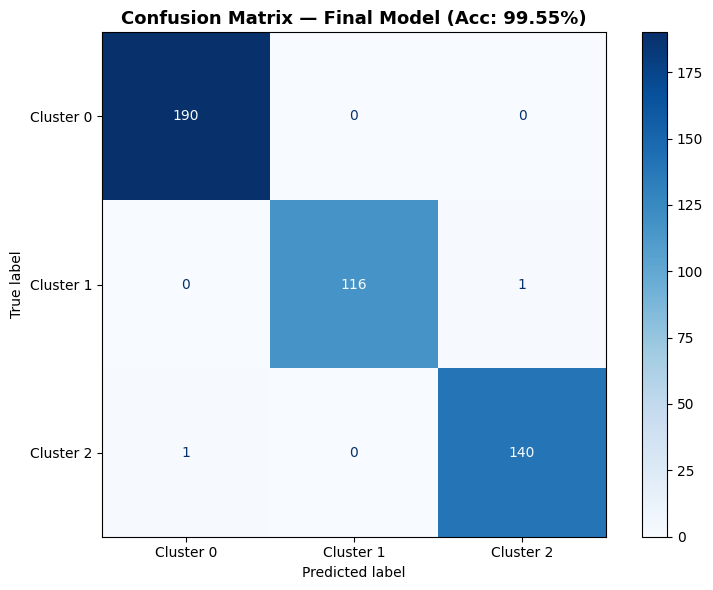

In [29]:
# Confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    best_model, X_test, y_test,
    display_labels=[f'Cluster {i}' for i in range(N_CLUSTERS)],
    cmap='Blues',
    ax=ax
)
ax.set_title(f'Confusion Matrix — Final Model (Acc: {final_accuracy:.2%})', 
             fontweight='bold', fontsize=13)
plt.tight_layout()
plt.savefig('plots/confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 💾 Step 11 — Save Final Model

In [30]:
import json

# Save the trained classifier
with open('models/model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save the KMeans clusterer
with open('models/kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# Save model metadata (for the API to display)
metadata = {
    'model_type': type(best_model).__name__,
    'best_params': grid_search.best_params_,
    'accuracy': round(final_accuracy, 4),
    'n_clusters': N_CLUSTERS,
    'feature_columns': list(X.columns),
    'trained_on': datetime.today().strftime('%Y-%m-%d %H:%M'),
    'cluster_sizes': df['cluster'].value_counts().sort_index().to_dict()
}

with open('models/metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

print('✅ All files saved to models/ folder:')
print('   📦 models/model.pkl          — Logistic Regression classifier')
print('   📦 models/preprocessor.pkl   — Scaler & transformer')
print('   📦 models/kmeans.pkl         — KMeans clusterer')
print('   📦 models/feature_columns.pkl — Column order')
print('   📄 models/metadata.json      — Model info for the API')
print()
print(f'\n🎯 Final accuracy: {final_accuracy:.2%}')
print(f'📁 These files go directly into your FastAPI project folder')

✅ All files saved to models/ folder:
   📦 models/model.pkl          — Logistic Regression classifier
   📦 models/preprocessor.pkl   — Scaler & transformer
   📦 models/kmeans.pkl         — KMeans clusterer
   📦 models/feature_columns.pkl — Column order
   📄 models/metadata.json      — Model info for the API


🎯 Final accuracy: 99.55%
📁 These files go directly into your FastAPI project folder


---
## ✅ Step 12 — Quick Sanity Check

Test that the saved model works correctly before moving to the API.

In [31]:
# Load saved objects and test a prediction end-to-end
with open('models/model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

with open('models/preprocessor.pkl', 'rb') as f:
    loaded_preprocessor = pickle.load(f)

with open('models/feature_columns.pkl', 'rb') as f:
    feature_cols = pickle.load(f)

# Simulate a new customer input (same format the API will receive)
sample_customer = {
    'Age': 45,
    'Education': 2,          # Graduate
    'Marital Status': 1,     # Has partner
    'Parental Status': 1,    # Has children
    'Children': 2,
    'Income': 55000,
    'Total_Spending': 800,
    'Days_as_Customer': 1200,
    'Recency': 30,
    'Wines': 300,
    'Fruits': 50,
    'Meat': 200,
    'Fish': 80,
    'Sweets': 60,
    'Gold': 110,
    'Web': 4,
    'Catalog': 3,
    'Store': 6,
    'Discount Purchases': 2,
    'Total Promo': 1,
    'NumWebVisitsMonth': 5
}

# Create DataFrame in correct column order
sample_df = pd.DataFrame([sample_customer])[feature_cols]

# Transform with saved preprocessor
sample_df = sample_df.astype(float)
sample_scaled = loaded_preprocessor.transform(sample_df)
sample_scaled_df = pd.DataFrame(sample_scaled, columns=feature_cols)

# Predict
predicted_cluster = loaded_model.predict(sample_scaled_df)[0]
predicted_proba = loaded_model.predict_proba(sample_scaled_df)[0]

print('=== Sanity Check ===')
print(f'Sample customer predicted cluster: {predicted_cluster}')
print(f'Prediction probabilities:')
for i, prob in enumerate(predicted_proba):
    print(f'  Cluster {i}: {prob:.2%}')
print()
print('✅ Model loaded and predicted successfully!')
print('🚀 Ready to build the FastAPI backend')

=== Sanity Check ===
Sample customer predicted cluster: 2
Prediction probabilities:
  Cluster 0: 0.00%
  Cluster 1: 0.00%
  Cluster 2: 100.00%

✅ Model loaded and predicted successfully!
🚀 Ready to build the FastAPI backend


---
## 📋 Summary

| Step | What we did |
|------|-------------|
| Data Cleaning | Filled Income NaN with median, dropped constant columns |
| Feature Engineering | Created Age, Children, Total_Spending, Days_as_Customer, etc. |
| Outlier Capping | IQR method on skewed features |
| Preprocessing | StandardScaler + PowerTransformer via ColumnTransformer |
| Clustering | KMeans with K=3 (chosen by Silhouette Score) |
| Classification | Compared 6 models, tuned best with GridSearchCV |
| Saved | model.pkl, preprocessor.pkl, kmeans.pkl, metadata.json |

### Next Step
Take the `models/` folder and use it in your FastAPI backend.
The API will:
1. Load `preprocessor.pkl` → transform incoming data
2. Load `model.pkl` → predict cluster
3. Return cluster number + probabilities to the Lovable frontend